In [ ]:
pip install matplotlib


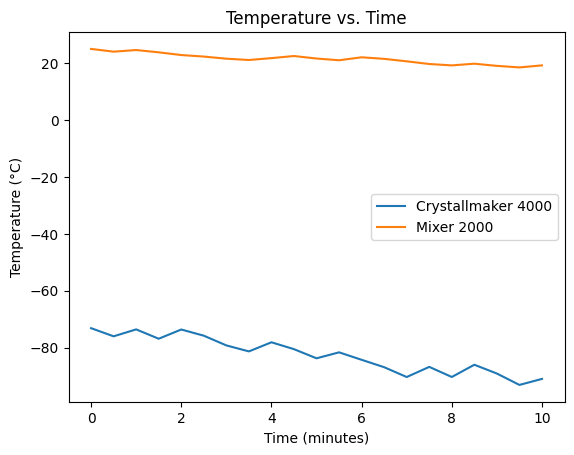

In [22]:
import xml.etree.ElementTree as ET
import random
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the XML content (replace 'your_file.xml' with the path to your XML file)
with open('/content/3unitoperation_temperature.xml', 'r') as xml_file:
    xml_content = xml_file.read()

# Parse the XML content
root = ET.fromstring(xml_content)

# Define observation time and time step
observation_time = timedelta(minutes=10)
time_step = timedelta(seconds=30)

# Initialize lists to store data for plotting
time_values = []
crystallmaker_temperature_values = []
mixer_temperature_values = []

# Helper function to convert temperature to Celsius
def convert_to_celsius(temperature_str):
    if '°C' in temperature_str:
        return float(temperature_str.replace('°C', ''))
    elif 'Kelvin' in temperature_str:
        kelvin_temp = float(temperature_str.split()[0])
        celsius_temp = kelvin_temp - 273.15
        return celsius_temp
    else:
        return 0.0  # Default temperature if not specified

# Simulate temperature over time for Crystallmaker 4000
current_time = timedelta(seconds=0)
starting_temperature = convert_to_celsius("200 Kelvin")  # Default starting temperature in Celsius
while current_time <= observation_time:
    time_values.append(current_time.total_seconds() / 60)  # Convert time to minutes
    crystallmaker_temperature_values.append(starting_temperature)

    # Randomly choose whether to increase or decrease temperature by 2-5%
    temperature_change = starting_temperature * random.uniform(0.02, 0.05)
    if random.choice([True, False]):
        starting_temperature += temperature_change  # Simulate temperature increase
    else:
        starting_temperature -= temperature_change  # Simulate temperature decrease

    current_time += time_step

# Simulate temperature over time for Mixer 2000
current_time = timedelta(seconds=0)
starting_temperature = convert_to_celsius("25°C")  # Default starting temperature in Celsius
while current_time <= observation_time:
    mixer_temperature_values.append(starting_temperature)

    # Randomly choose whether to increase or decrease temperature by 2-5%
    temperature_change = starting_temperature * random.uniform(0.02, 0.05)
    if random.choice([True, False]):
        starting_temperature += temperature_change  # Simulate temperature increase
    else:
        starting_temperature -= temperature_change  # Simulate temperature decrease

    current_time += time_step

# Create a plot with both temperature graphs
plt.plot(time_values, crystallmaker_temperature_values, label='Crystallmaker 4000')
plt.plot(time_values, mixer_temperature_values, label='Mixer 2000')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time')
plt.legend()
plt.show()
